## Data Processing

In [1]:
# Data = CMAPSSData
# Source = https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/
# Dataset = Turbofan Engine Degradation Simulation Data Set

In [2]:
# Data to be used - Train and Test data for 1

In [3]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

### Notebook options

In [4]:
pd.set_option('display.max_colwidth', -1) # Column width
plt.rcParams['figure.figsize'] = [15, 10] # Size of the plots

### Data Directories

In [5]:
INPUT_DIR = '../data/raw/CMAPSSData/'
OUTPUT_DIR = '../data/interim/'

### Read the input data

In [6]:
input_file = INPUT_DIR + 'train_FD002.txt'
col_headers = ['unit', 'time_cycles', 'setting1', 'setting2', 'setting3', 
              'meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 
              'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas16', 'meas17', 'meas18', 'meas19', 'meas20', 
              'meas21', 'meas22', 'meas23', 'meas24', 'meas25', 'meas26']

df_raw = pd.read_csv(input_file, header=None, sep=' ', names=col_headers)

In [7]:
df_raw.head()

,unit,time_cycles,setting1,setting2,setting3,meas01,meas02,meas03,meas04,meas05,...,meas17,meas18,meas19,meas20,meas21,meas22,meas23,meas24,meas25,meas26
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,334,2223,100.00,14.73,8.8071,NaN,NaN,NaN,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,330,2212,100.00,10.41,6.2665,NaN,NaN,NaN,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,309,1915,84.93,14.08,8.6723,NaN,NaN,NaN,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,329,2212,100.00,10.59,6.4701,NaN,NaN,NaN,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,309,1915,84.93,14.13,8.5286,NaN,NaN,NaN,NaN,NaN


In [8]:
cols = ['unit', 'time_cycles', 'setting1', 'setting2', 'setting3']
df_raw[cols].describe()

,unit,time_cycles,setting1,setting2,setting3
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,131.082981,109.154746,23.998407,0.572056,94.046020
std,74.463862,69.180569,14.747376,0.310016,14.237735
min,1.000000,1.000000,0.000000,0.000000,60.000000
25%,68.000000,52.000000,10.004600,0.250700,100.000000
50%,131.000000,104.000000,25.001300,0.700000,100.000000
75%,195.000000,157.000000,41.998000,0.840000,100.000000
max,260.000000,378.000000,42.008000,0.842000,100.000000


In [9]:
cols = ['meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07']
df_raw[cols].describe()

,meas01,meas02,meas03,meas04,meas05,meas06,meas07
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,472.910207,579.672399,1419.971013,1205.442024,8.031986,11.600746,282.606787
std,26.389707,37.289399,105.946341,119.123428,3.613839,5.431802,146.005306
min,445.000000,535.530000,1243.730000,1023.770000,3.910000,5.710000,136.800000
25%,445.000000,549.570000,1352.760000,1123.655000,3.910000,5.720000,139.935000
50%,462.540000,555.980000,1369.180000,1138.890000,7.050000,9.030000,194.660000
75%,491.190000,607.340000,1499.370000,1306.850000,10.520000,15.490000,394.080000
max,518.670000,644.520000,1612.880000,1439.230000,14.620000,21.610000,555.820000


In [10]:
cols = ['meas08', 'meas09', 'meas10', 'meas11', 'meas12', 'meas13', 'meas14']
df_raw[cols].describe()

,meas08,meas09,meas10,meas11,meas12,meas13,meas14
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,2228.879188,8525.200837,1.094962,42.985172,266.069034,2334.557253,8066.597682
std,145.209816,335.812013,0.127469,3.232372,137.659507,128.068271,84.837950
min,1914.770000,7985.560000,0.930000,36.230000,129.120000,2027.610000,7848.360000
25%,2211.880000,8321.660000,1.020000,41.910000,131.520000,2387.900000,8062.140000
50%,2223.070000,8361.200000,1.020000,42.390000,183.200000,2388.080000,8082.540000
75%,2323.960000,8778.030000,1.260000,45.350000,371.260000,2388.170000,8127.195000
max,2388.390000,9215.660000,1.300000,48.510000,523.370000,2390.480000,8268.500000


In [11]:
cols = ['meas15', 'meas16', 'meas17', 'meas18', 'meas19', 'meas20', 'meas21']
df_raw[cols].describe()

,meas15,meas16,meas17,meas18,meas19,meas20,meas21
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423
std,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615
min,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500
25%,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300
50%,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200
75%,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200
max,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100


In [12]:
df_raw[['unit', 'time_cycles']].groupby('unit').count()

,time_cycles
unit,
1,149
2,269
3,206
4,235
5,154
6,175
7,174
8,151
9,199


### Data Statistics

In [13]:
features = list(set(col_headers) - set(['time_cycles','unit']))
print(features)

['meas07', 'meas02', 'meas08', 'meas20', 'meas23', 'meas12', 'setting1', 'meas10', 'setting3', 'meas11', 'meas22', 'meas06', 'meas25', 'meas05', 'meas14', 'meas01', 'meas26', 'meas16', 'meas04', 'meas03', 'setting2', 'meas15', 'meas19', 'meas09', 'meas13', 'meas24', 'meas18', 'meas17', 'meas21']


In [14]:
df_stats = pd.DataFrame(columns=['feature', 
                                 'total_count', 
                                 'missing_val_count', 
                                 'max_val', 
                                 'min_val', 
                                 'variance', 
                                 'std', 
                                 'mean_val', 
                                 'median_val', 
                                 'kurt', 
                                 'skew'])

idx = 0
for feature in features:
    
    df = df_raw[['unit', feature]]
    
    new_row = {
        'feature':feature, 
        'total_count': len(df), 
        'missing_val_count': len(df)-df[feature].count(), 
        'max_val': df[feature].max(), 
        'min_val': df[feature].min(), 
        'variance': df[feature].var(), 
        'std': df[feature].std(), 
        'mean_val': df[feature].mean(), 
        'median_val': df[feature].median(), 
        'kurt': df[feature].kurt(), 
        'skew': df[feature].skew()
    }
    
    df_stats.loc[idx] = new_row
    idx += 1
        
# Get the percentage missing values
df_stats['perc_missing'] = df_stats['missing_val_count']/df_stats['total_count'] * 100

In [15]:
df_stats

,feature,total_count,missing_val_count,max_val,min_val,variance,std,mean_val,median_val,kurt,skew,perc_missing
0,meas07,53759,0,555.8200,136.8000,21317.549421,146.005306,282.606787,194.6600,-0.876422,0.696667,0
1,meas02,53759,0,644.5200,535.5300,1390.499279,37.289399,579.672399,555.9800,-1.312503,0.437475,0
2,meas08,53759,0,2388.3900,1914.7700,21085.890683,145.209816,2228.879188,2223.0700,0.499081,-1.222110,0
3,meas20,53759,0,39.3400,10.1800,97.403698,9.869331,20.789296,14.8800,-0.938476,0.640040,0
4,meas23,53759,53759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
5,meas12,53759,0,523.3700,129.1200,18950.139854,137.659507,266.069034,183.2000,-0.875668,0.697869,0
6,setting1,53759,0,42.0080,0.0000,217.485101,14.747376,23.998407,25.0013,-1.225432,-0.258699,0
7,meas10,53759,0,1.3000,0.9300,0.016248,0.127469,1.094962,1.0200,-1.201946,0.600846,0
8,setting3,53759,0,100.0000,60.0000,202.713087,14.237735,94.046020,100.0000,1.893363,-1.973143,0
9,meas11,53759,0,48.5100,36.2300,10.448229,3.232372,42.985172,42.3900,-0.321088,-0.545593,0


### Plotting Variances

In [16]:
def stats_plot(df_stats, use_tags=[], stat_col='variance', feature_col = 'feature'):
            
    df_variances = df_stats[[feature_col, stat_col]]
    df_variances = df_variances.loc[df_variances[stat_col] > 0.05]
    df_variances = df_variances.sort_values([stat_col], ascending=False)
    x = df_variances[feature_col]
    y = df_variances[stat_col]
    x_pos = np.arange(len(x))

    plt.bar(x_pos, y, align='center', alpha=0.5)
    plt.xticks(x_pos, x, rotation=45)
    plt.xlabel('Features')
    plt.ylabel(stat_col)
    plt.title(str(stat_col) + ' among different parameters')

    plt.show()

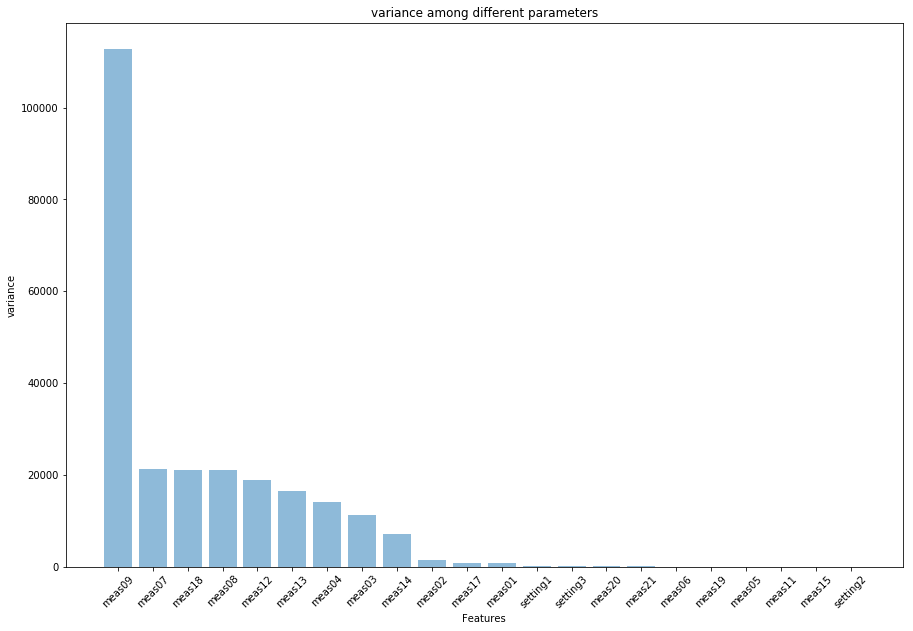

In [17]:
stats_plot(df_stats, [], 'variance', 'feature')

### Remove un-ncessary rows and columns from the data

In [18]:
df_raw.drop(columns=['meas22','meas23','meas24','meas25','meas26'], inplace=True)
df_raw.dropna(inplace=True)

### Writing to file

In [19]:
output_file = OUTPUT_DIR + 'train_case2.csv'
df_raw.to_csv(output_file, sep=',', index=False)

### Reading from a file to check vals

In [20]:
df_test = pd.read_csv(output_file)

In [21]:
df_test.head()

,unit,time_cycles,setting1,setting2,setting3,meas01,meas02,meas03,meas04,meas05,...,meas12,meas13,meas14,meas15,meas16,meas17,meas18,meas19,meas20,meas21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
